# CIS 508 - Team 6 Project Submission
### BY
#### Kalpana Kumaravelu
#### Pooja Kharkar
#### Pragya Shukla
#### Shubham Kislay
#### Yash Verma

## BestCard

## Step 1: Data Preprecessing

In this step, you need to read the data, have an overview of the data, and perform label encoding for both the predictors and target variable.

1. first let's read the data.


In [4]:
import pandas as pd
defaulted = pd.read_csv("BestCard_data.csv")

In [5]:
defaulted.shape

(26664, 31)

In [6]:
defaulted.dtypes

ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
EDUCATION_CAT                 object
graduate school                int64
h

In [7]:
defaulted.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
EDUCATION_CAT                 0
graduate school               0
high school                   0
none                          0
others                        0
university                    0
dtype: i

In [8]:
defaulted['default payment next month'].value_counts()

default payment next month
0    20750
1     5914
Name: count, dtype: int64

## Step 2: Explore the PAY_X columns (assumed to be PAY_1 to PAY_6)

In [10]:
# Explore the PAY_X columns (assumed to be PAY_1 to PAY_6)
pay_columns = [col for col in defaulted.columns if col.startswith("PAY_")]
print("PAY_X columns summary:\n", defaulted[pay_columns].describe())


PAY_X columns summary:
               PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  26664.000000  26664.000000  26664.000000  26664.000000  26664.000000   
mean      -0.017777     -0.133363     -0.167679     -0.225023     -0.269764   
std        1.126769      1.198640      1.199165      1.167897      1.131735   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6       PAY_AMT1      PAY_AMT2       PAY_AMT3  \
count  26664.000000   26664.000000  2.666400e+04   26664.000000   
mean      -0.293579    5704.085771  5.881110e+03    5259.514964   
std        1.150229   16699.398632  2.121431e+04   17265.439561

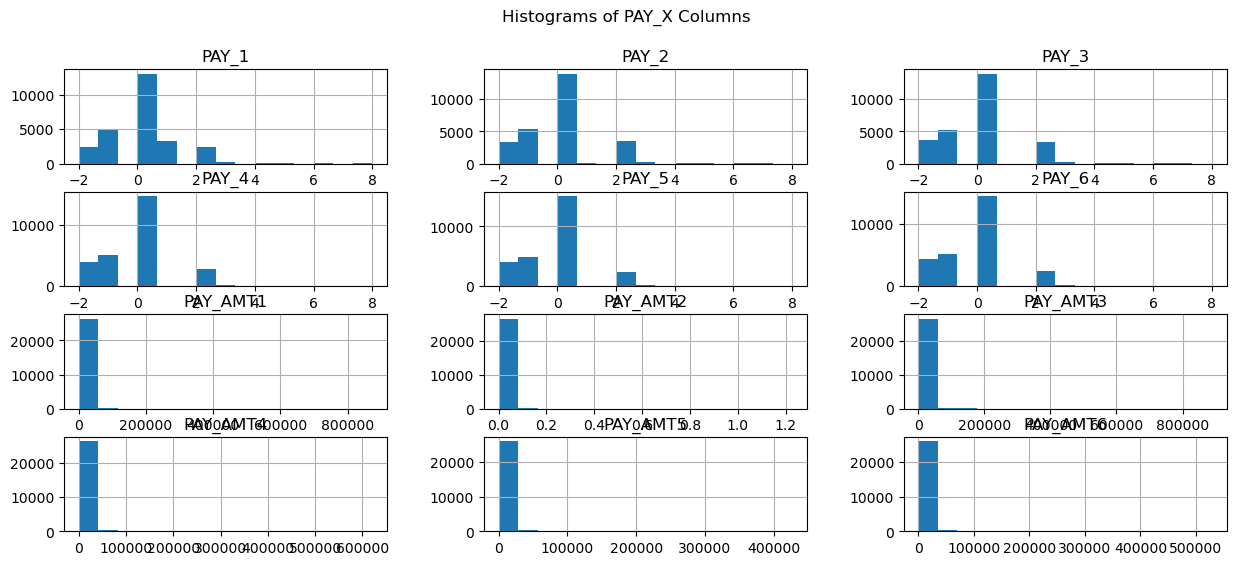

In [11]:
import matplotlib.pyplot as plt
# Plot histograms for PAY_X columns to visualize payment status distribution
defaulted[pay_columns].hist(bins=15, figsize=(15, 6))
plt.suptitle("Histograms of PAY_X Columns")
plt.show()

## Step 3: Feature Selection


####  New Feature 1: Credit Utilization = BILL_AMT6 / LIMIT_BAL
##### This ratio gives a clear metric of how much credit is being used relative to the credit limit. High utilization could indicate that a customer is overextending financially, which may lead to a higher risk of default.

##### Feature Engineering: Adding derived features like credit utilization can help improve the model’s accuracy by providing additional, meaningful information that raw features might not fully capture.


In [13]:
if 'BILL_AMT6' in defaulted.columns and 'LIMIT_BAL' in defaulted.columns:
    defaulted['credit_utilization'] = defaulted['BILL_AMT6'] / defaulted['LIMIT_BAL']

### New Feature 2: Repayment Ratio = (sum(PAY_AMT1-6)) / LIMIT_BAL
####  The ratio is defined as the total repaid amount over the six billing periods divided by the credit limit (LIMIT_BAL).
#### The repayment ratio provides an indicator of how much of their available credit a customer repays over time. A higher ratio could signal responsible repayment behavior, whereas a lower ratio might indicate potential financial stress.

In [15]:
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
if all(col in defaulted.columns for col in pay_amt_cols):
    defaulted['repayment_ratio'] = defaulted[pay_amt_cols].sum(axis=1) / defaulted['LIMIT_BAL']
else:
    raise ValueError("One or more PAY_AMT columns (PAY_AMT1 to PAY_AMT6) are missing.")

### New Feature 3: Payment Behavior Trend = PAY_1 - PAY_6

#### If payment_behavior_trend is positive, it suggests that the payment status was worse in the first month compared to the sixth month (assuming a higher value indicates poorer payment behavior). Conversely, a negative value indicates that the payment situation deteriorated from month 1 to month 6.

#### This trend gives insight into whether a customer's payment performance is improving or worsening over time, which can be an important indicator in predicting default risk.

In [17]:
if 'PAY_1' in defaulted.columns and 'PAY_6' in defaulted.columns:
    defaulted['payment_behavior_trend'] = defaulted['PAY_1'] - defaulted['PAY_6']
else:
    raise ValueError("PAY_1 or PAY_6 column is missing.")

## Step 4: Feature Scaling

In [19]:

#cols = list(range(1, 24)) + list(range(25, 31))
#X = pd.get_dummies(defaulted.iloc[:, cols], drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_ORGN = defaulted.drop(['default payment next month','ID'],axis = 1)
X_ORGN = pd.get_dummies(X_ORGN, drop_first=True)
X = pd.DataFrame(scaler.fit_transform(X_ORGN), columns=X_ORGN.columns)


In [20]:
X.shape

(26664, 35)

## Step 5: Label Encoding

In [22]:
#Encoding target variable
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(defaulted['default payment next month'].values)

## Step 6: Splitting Data into Training and Testing sets

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Selection

## 1. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)

### Training

In [29]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 1.000


### Predicting

In [32]:
y_pred = tree.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.723


### Building Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3389  815]
 [ 662  467]]


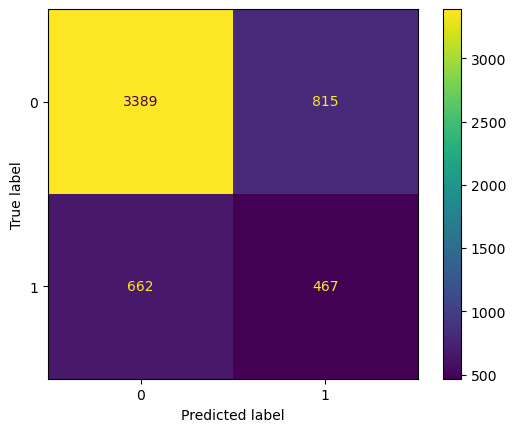

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree.classes_)
disp.plot()
plt.show()

In [37]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.723


### Pruning

In [39]:
tree_pruned = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy on training set: {:.3f}".format(tree_pruned.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pruned_pred, y_test)))

Accuracy on training set: 0.822
Accuracy on test set: 0.828


In [41]:
# variable importance in decision tree
importance = pd.DataFrame(tree.feature_importances_, index = X.columns, columns = ["Importance"]).sort_values(by= "Importance", ascending= False)
importance

,Importance
PAY_1,0.157988
AGE,0.070420
BILL_AMT1,0.057011
repayment_ratio,0.054019
PAY_AMT3,0.051240
LIMIT_BAL,0.049582
credit_utilization,0.047611
PAY_AMT6,0.045319
PAY_AMT4,0.042542
BILL_AMT5,0.039923


## Tree Visualization

In [ ]:
pip install graphviz

In [43]:
## some settings might need to install and import graphviz
##use  conda install python-graphviz to install graphviz if you get error saying there is no module called graphviz
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_pruned,
                           class_names= ["not survived", "survived"],
                           feature_names=X_train.columns,
                           filled = True)

graph = graphviz.Source(dot_data, format= "png")
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

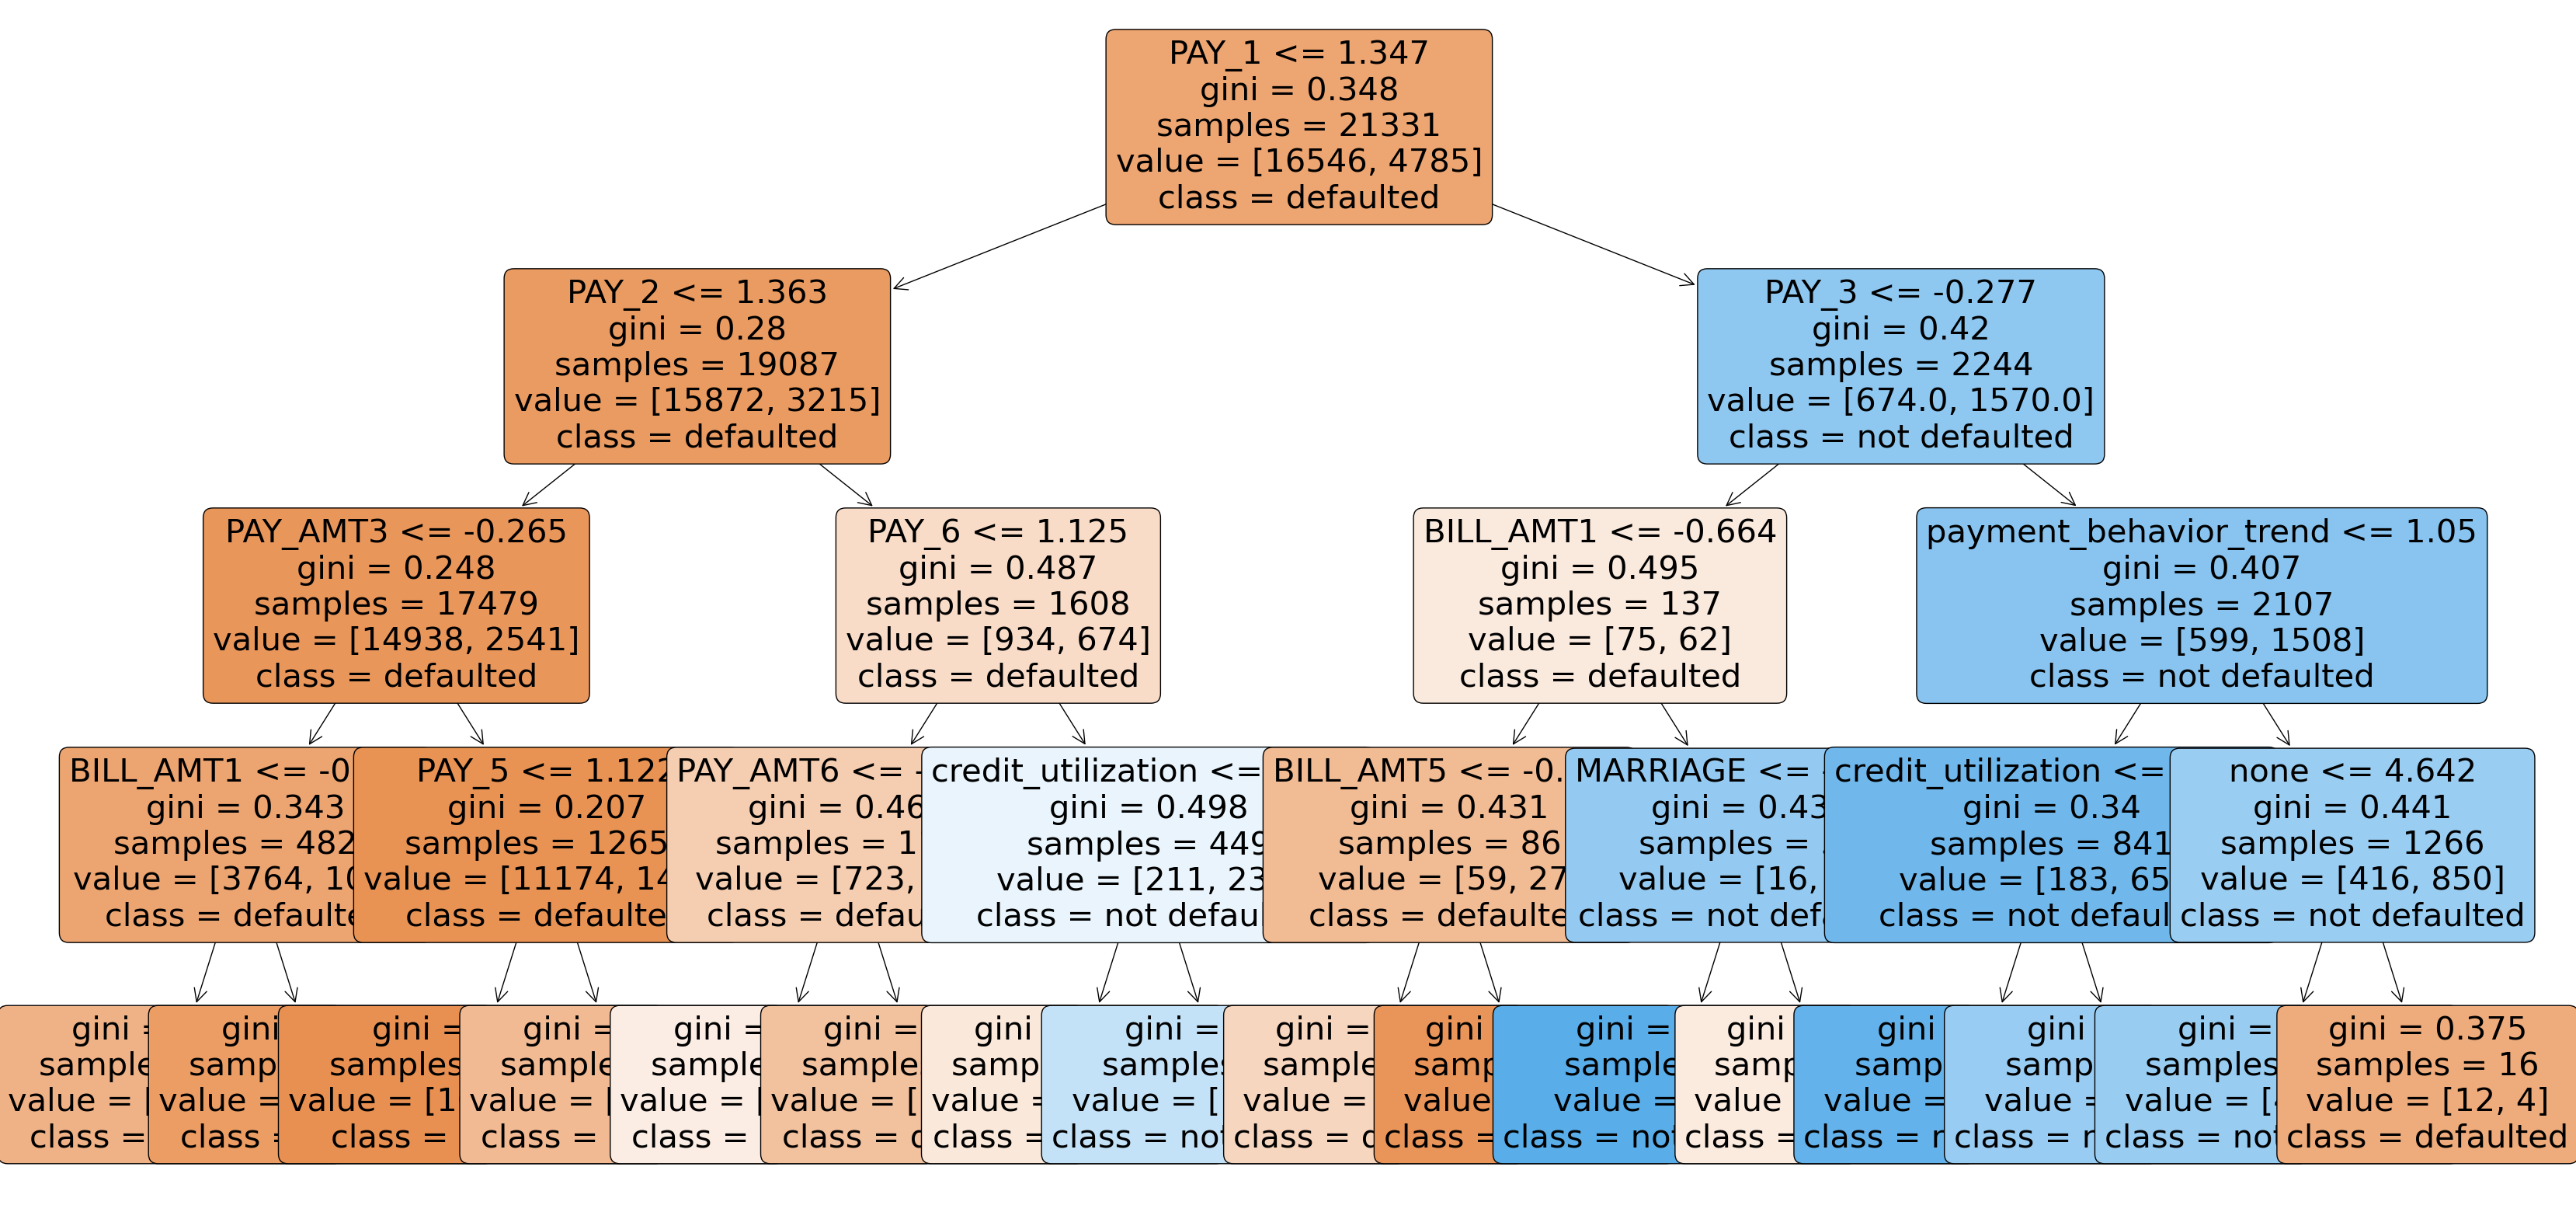

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
display_tree = plot_tree(tree_pruned, 
              feature_names=X.columns.tolist(), 
              class_names=["defaulted", "not defaulted"], 
              filled=True, 
              rounded=True,
              fontsize=30)

In [45]:
#keep probabilities for the positive outcome only
tree_pruned.predict_proba(X_test)

array([[0.89107525, 0.10892475],
       [0.89107525, 0.10892475],
       [0.89107525, 0.10892475],
       ...,
       [0.72022881, 0.27977119],
       [0.89107525, 0.10892475],
       [0.89107525, 0.10892475]])

In [46]:
y_pruned_pred_proba = tree_pruned.predict_proba(X_test)[:,1]

## ROC Curve

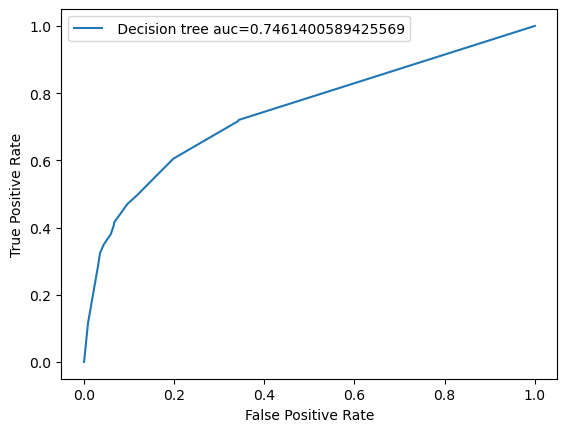

In [48]:
# create roc curve and calculate auc value
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, y_pruned_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pruned_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()

## 2. Logistic Regression

### Training

In [51]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 10000)

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [52]:
coef = pd.DataFrame(logreg.coef_[0], index = X.columns,columns=['Coefficients'])
coef

,Coefficients
LIMIT_BAL,-0.135426
SEX,-0.049794
EDUCATION,-0.029256
MARRIAGE,-0.081606
AGE,0.059879
PAY_1,0.438731
PAY_2,0.091045
PAY_3,0.113142
PAY_4,0.022298
PAY_5,0.033324


### Prediction

In [54]:
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
import sklearn.metrics as metrics
print("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy::0.823


### Confusion Matrix

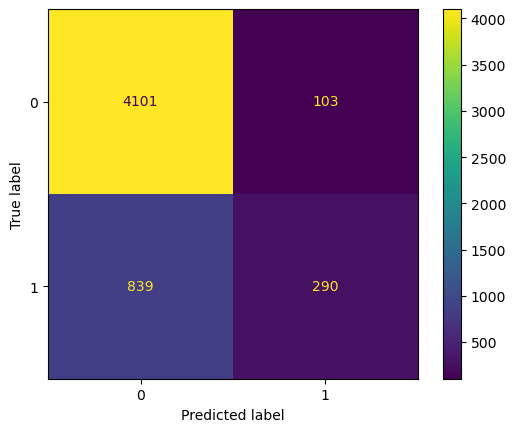

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()
plt.show()

### ROC Curve

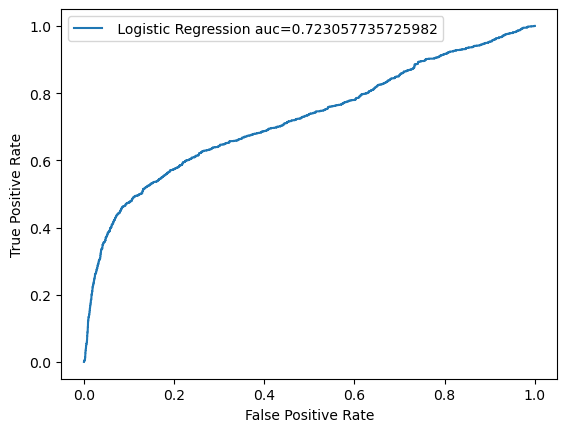

In [59]:
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#plt.legend(loc=4)
# show the legend
pyplot.legend()
plt.show()

## 3. Support Vector Machine

### Training

In [62]:

from sklearn.svm import SVC

# Train SVM with balanced class weighting
svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=0)
svm_model.fit(X_train, y_train)


SVC(class_weight='balanced', random_state=0)

### Prediction

In [64]:

from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = svm_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:", classification_rep)


Accuracy: 0.7839864991561972
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.84      0.86      4204
           1       0.49      0.58      0.53      1129

    accuracy                           0.78      5333
   macro avg       0.69      0.71      0.70      5333
weighted avg       0.80      0.78      0.79      5333



## 4. KNN

In [67]:
import pandas as pd  # For handling dataset
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.tree import DecisionTreeClassifier, export_text  # Decision tree model
from sklearn.neighbors import KNeighborsClassifier  # KNN model
from sklearn import tree  # For visualization
import graphviz  # To render the decision tree
from sklearn.metrics import accuracy_score, classification_report  # For evaluation

### Train a KNN Classifier

In [69]:
model_knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluate the KNN Model

In [71]:
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn:.2f}")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 0.80
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4204
           1       0.55      0.36      0.43      1129

    accuracy                           0.80      5333
   macro avg       0.69      0.64      0.66      5333
weighted avg       0.78      0.80      0.79      5333



## 5. XGBOOST

In [73]:
import os

# Run the conda install command
os.system("conda install -y xgboost")


0

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb

### i) Ensemble

In [76]:
boosting_model = xgb.XGBClassifier(enable_categorical=True,eval_metric='logloss', random_state=0)
boosting_model.fit(X_train, y_train)
y_boosting_pred = boosting_model.predict(X_test)

print("Boosting Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_boosting_pred)))

Boosting Model Accuracy on test set: 0.815


In [77]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100, random_state=0)
bagging.fit(X_train, y_train)
y_bagging_pred = bagging.predict(X_test)

print("Bagging Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_bagging_pred)))

Bagging Model Accuracy on test set: 0.821


#### ii). Bagging: Wrap XGBoost in a BaggingClassifier

In [79]:
# Define your base model using XGBoost
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Use 'estimator' instead of 'base_estimator'
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=0)
bagging_model.fit(X_train, y_train)
y_bagging_pred = bagging_model.predict(X_test)

print("Bagging Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_bagging_pred)))

C:\Users\kalpa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:34:09] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\kalpa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:34:10] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\kalpa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:34:11] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\kalpa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:34:12] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" 

Bagging Model Accuracy on test set: 0.827


In [80]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators = 100, random_state=0)
boost.fit(X_train, y_train)

y_boost_pred = boost.predict(X_test)
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_boost_pred, y_test)))

C:\Users\kalpa\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy on test set: 0.829


### iii) Random Forest (XGBoost mode): Using XGBRFClassifier
#### Note: XGBRFClassifier is XGBoost's random-forest variant.

In [82]:
xgb_rf_model = xgb.XGBRFClassifier(eval_metric='logloss', random_state=0, n_estimators=100)
xgb_rf_model.fit(X_train, y_train)
y_xgb_rf_pred = xgb_rf_model.predict(X_test)

print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_xgb_rf_pred)))

Random Forest Accuracy on test set: 0.829


### Define a Function to Compute ROC Metrics

In [84]:
def compute_roc(model, X_test, y_test):
    # Obtain predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]
    # Compute FPR and TPR for different thresholds
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    # Compute AUC
    model_auc = auc(fpr, tpr)
    return fpr, tpr, model_auc


In [85]:
# Compute ROC metrics for each model
fpr_boost, tpr_boost, auc_boost = compute_roc(boosting_model, X_test, y_test)
fpr_bag, tpr_bag, auc_bag = compute_roc(bagging_model, X_test, y_test)
fpr_rf, tpr_rf, auc_rf = compute_roc(xgb_rf_model, X_test, y_test)

### Plot Separate ROC Curves for Each Model

#### 1. Boosting ROC Curves (XGBoost)

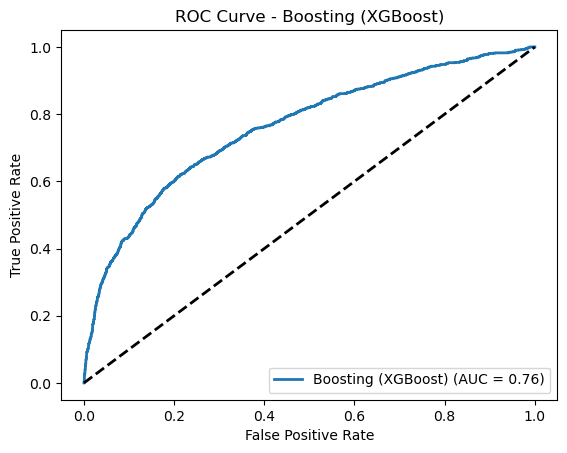

In [87]:
plt.figure()
plt.plot(fpr_boost, tpr_boost, lw=2, label=f'Boosting (XGBoost) (AUC = {auc_boost:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Boosting (XGBoost)')
plt.legend(loc="lower right")
plt.show()

#### Bagging (XGBoost as base estimator)

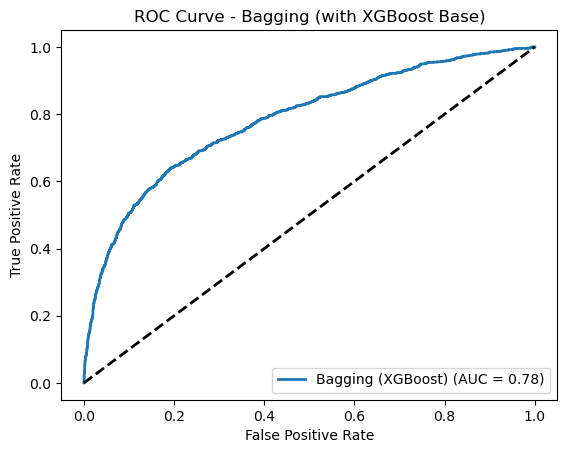

In [89]:
plt.figure()
plt.plot(fpr_bag, tpr_bag, lw=2, label=f'Bagging (XGBoost) (AUC = {auc_bag:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging (with XGBoost Base)')
plt.legend(loc="lower right")
plt.show()

#### Bagging (XGBoost as base estimator)

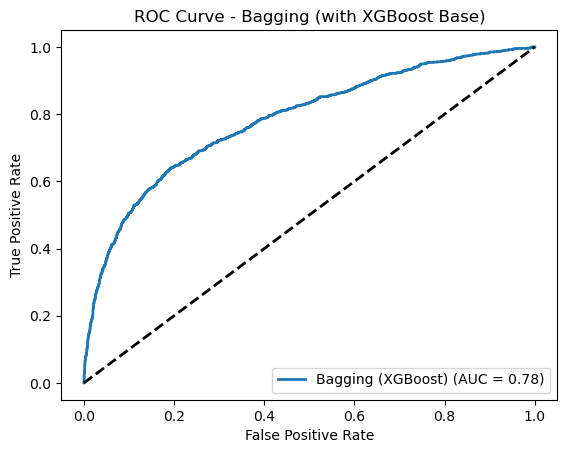

In [91]:
plt.figure()
plt.plot(fpr_bag, tpr_bag, lw=2, label=f'Bagging (XGBoost) (AUC = {auc_bag:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging (with XGBoost Base)')
plt.legend(loc="lower right")
plt.show()

#### Random Forest (XGBoost Random Forest Variant)

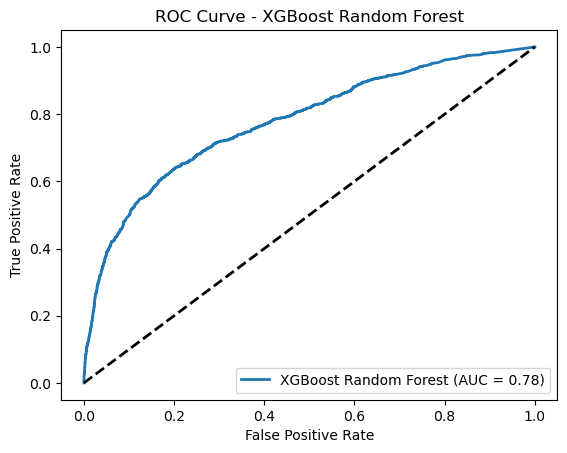

In [93]:
# Random Forest (XGBoost Random Forest Variant)
plt.figure()
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'XGBoost Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Random Forest')
plt.legend(loc="lower right")
plt.show()

### Step 9: Plot Combined ROC Curve for All Three Models and Compare the AUC

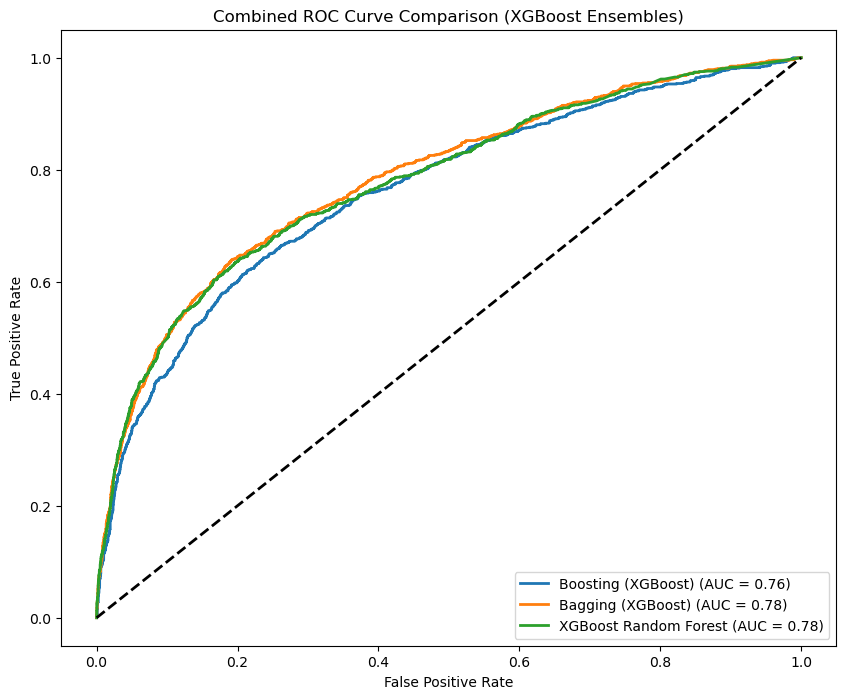

In [95]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_boost, tpr_boost, lw=2, label=f'Boosting (XGBoost) (AUC = {auc_boost:.2f})')
plt.plot(fpr_bag, tpr_bag, lw=2, label=f'Bagging (XGBoost) (AUC = {auc_bag:.2f})')
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'XGBoost Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Reference diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve Comparison (XGBoost Ensembles)')
plt.legend(loc="lower right")
plt.show()

### Step 10: Print AUC Scores for Comparison

In [97]:
print("AUC Scores:")
print(f"Boosting (XGBoost) AUC: {auc_boost:.2f}")
print(f"Bagging (XGBoost) AUC: {auc_bag:.2f}")
print(f"XGBoost Random Forest AUC: {auc_rf:.2f}")

AUC Scores:
Boosting (XGBoost) AUC: 0.76
Bagging (XGBoost) AUC: 0.78
XGBoost Random Forest AUC: 0.78


In [98]:
tree = DecisionTreeClassifier(random_state=0)
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

## 6. Neural Networks

In [100]:
# Please install tensorflow to get those two lines worked
import tensorflow as tf
print(tf.__version__)

2.18.0


In [101]:
# Importing necessary libraries
import numpy as np  # For numerical operations (like creating arrays, generating random numbers)
import tensorflow as tf  # TensorFlow library for building and training deep learning models
import random as python_random  # Python's built-in random library for generating random numbers
from tensorflow.keras.models import Sequential  # For creating a neural network model in a linear stack
from keras.layers import Dense  # For adding fully connected layers (Dense layers) to the model

# Setting random seeds to ensure reproducibility of results
np.random.seed(0)  # Sets the seed for NumPy's random number generator
tf.random.set_seed(0)  # Sets the seed for TensorFlow's random number generator
python_random.seed(0)  # Sets the seed for Python's random module

### Setting parameters

In [103]:
# Define the Keras model: Initialize a Sequential model which is a linear stack of layers
model = Sequential()
# Add the first fully connected (Dense) layer with 36 units and ReLU activation function
# input_dim=8 indicates that the input layer has 8 features (input variables)
# 'relu' is the activation function used to introduce non-linearity
model.add(Dense(36, input_dim=35, activation='relu'))

# Add another fully connected (Dense) layer with 6 units and ReLU activation function
# This layer will learn from the output of the previous layer
model.add(Dense(6, activation='relu'))

# Add the output layer with 1 unit, which provides the final prediction
# No activation function is used in the output layer, indicating a regression problem (continuous output)
model.add(Dense(1,activation='sigmoid'))

C:\Users\kalpa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
# Compile the Keras model by specifying the loss function, optimizer, and metrics
# 'loss' is the function that measures the error during training. Here, we use 'mean_squared_error' (MSE), 
# which is a common loss function for regression problems. It calculates the average squared difference 
# between predicted and actual values.
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


### Training

In [106]:
# Fit the Keras model on the training dataset
# The 'fit' method trains the model on the provided training data (X_train, y_train)
# 'epochs=200' specifies the number of times the entire dataset will be passed through the model during training
# 'batch_size=10' indicates that the model will update the weights after every 10 samples in each epoch
model.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7808 - loss: 0.5146
Epoch 2/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8190 - loss: 0.4504
Epoch 3/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8201 - loss: 0.4458
Epoch 4/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8206 - loss: 0.4431
Epoch 5/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8204 - loss: 0.4419
Epoch 6/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8198 - loss: 0.4408
Epoch 7/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8198 - loss: 0.4400
Epoch 8/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8201 - loss: 0.4393
Epoch 9/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8214 - loss: 0.4389
Epoch 10/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8210 - loss: 0.4389
Epoch 11/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8215 - loss: 0.4389
Epoch 12/100
2134/

In [107]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.3f}')

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8205 - loss: 0.4683
Test Accuracy: 0.823


# Combined ROC Curve for all models

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


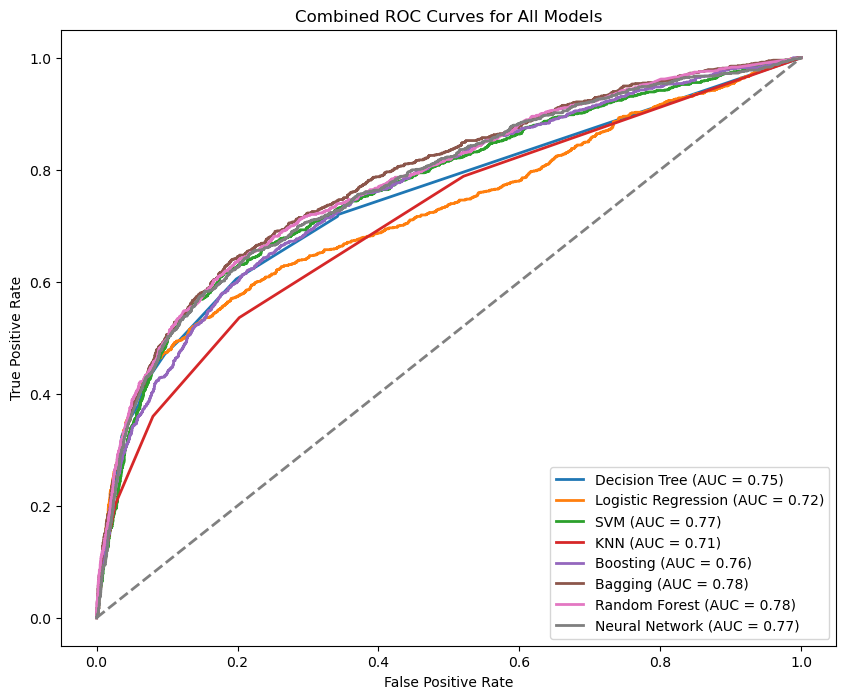

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def get_roc_data(model, X_test, y_test, is_nn=False):
    """
    Computes the ROC curve and AUC for a given model.
    
    If is_nn is True, uses model.predict (for Keras models).
    Otherwise, attempts to use model.predict_proba; if not available, uses decision_function.
    """
    if is_nn:
        # For neural networks, model.predict returns probabilities.
        y_proba = model.predict(X_test).ravel()
    else:
        try:
            # Try using predict_proba (for classifiers that support it)
            y_proba = model.predict_proba(X_test)[:, 1]
        except AttributeError:
            # Fall back to decision_function (e.g., some SVMs) and scale the scores to [0,1]
            y_scores = model.decision_function(X_test)
            y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    model_auc = auc(fpr, tpr)
    return fpr, tpr, model_auc

# Dictionary of models with their display names
models = {
    'Decision Tree': tree_pruned,
    'Logistic Regression': logreg,
    'SVM': svm_model,  # Ensure svm_model is instantiated with probability=True or supports decision_function
    'KNN': model_knn,
    'Boosting': boosting_model,
    'Bagging': bagging_model,
    'Random Forest': xgb_rf_model,
    ##'Random Forest': forest,
    'Neural Network': model
}

plt.figure(figsize=(10, 8))

# Loop through the models, compute ROC metrics, and plot each ROC curve
for name, model_obj in models.items():
    if name == 'Neural Network':
        fpr, tpr, model_auc = get_roc_data(model_obj, X_test, y_test, is_nn=True)
    else:
        fpr, tpr, model_auc = get_roc_data(model_obj, X_test, y_test)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {model_auc:.2f})')

# Plot a reference diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for All Models')
plt.legend(loc="lower right")
plt.show()


In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary of models (replace with your actual trained models)
models = {
    "Decision Tree": tree_pruned,
    "Logistic Regression": logreg,
    "SVM": svm_model,
    "KNN": model_knn,
    "Boosting": boosting_model,
    "Bagging": bagging_model,
    "Random Forest": xgb_rf_model,
    "Neural Network": model  # Keras model
}

print("Evaluation Metrics for All Models:")

for name, model_obj in models.items():
    # Get predictions; for Neural Network, threshold the probability output at 0.5
    if name == "Neural Network":
        # model.predict returns probabilities so we threshold them
        y_prob = model_obj.predict(X_test)
        y_pred = (y_prob > 0.5).astype(int).ravel()
    else:
        y_pred = model_obj.predict(X_test)
    
    # Compute the metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the results
    print(f"\n{name}:")
    print(f"  Accuracy : {acc:.3f}")
    print(f"  Precision: {prec:.3f}")
    print(f"  Recall   : {rec:.3f}")
    print(f"  F1 Score : {f1:.3f}")


Evaluation Metrics for All Models:

Decision Tree:
  Accuracy : 0.828
  Precision: 0.682
  Recall   : 0.349
  F1 Score : 0.462

Logistic Regression:
  Accuracy : 0.823
  Precision: 0.738
  Recall   : 0.257
  F1 Score : 0.381

SVM:
  Accuracy : 0.784
  Precision: 0.491
  Recall   : 0.583
  F1 Score : 0.533

KNN:
  Accuracy : 0.801
  Precision: 0.547
  Recall   : 0.360
  F1 Score : 0.434

Boosting:
  Accuracy : 0.815
  Precision: 0.607
  Recall   : 0.365
  F1 Score : 0.456

Bagging:
  Accuracy : 0.827
  Precision: 0.658
  Recall   : 0.378
  F1 Score : 0.480

Random Forest:
  Accuracy : 0.829
  Precision: 0.657
  Recall   : 0.406
  F1 Score : 0.502
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Neural Network:
  Accuracy : 0.823
  Precision: 0.695
  Recall   : 0.293
  F1 Score : 0.412


In [111]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary of models (replace with your actual trained models)
models = {
    "Decision Tree": tree_pruned,
    "Logistic Regression": logreg,
    "SVM": svm_model,
    "KNN": model_knn,
    "Boosting": boosting_model,
    "Bagging": bagging_model,
    "Random Forest": xgb_rf_model,
    "Neural Network": model  # Keras model
}

# Initialize list to store metrics for each model
metrics_data = []

for name, model_obj in models.items():
    # For Neural Network, threshold the probability output at 0.5
    if name == "Neural Network":
        y_prob = model_obj.predict(X_test)
        y_pred = (y_prob > 0.5).astype(int).ravel()
    else:
        y_pred = model_obj.predict(X_test)
    
    # Compute evaluation metrics
    acc   = accuracy_score(y_test, y_pred)
    prec  = precision_score(y_test, y_pred)
    rec   = recall_score(y_test, y_pred)
    f1    = f1_score(y_test, y_pred)
    
    # Append the metrics as a dictionary
    metrics_data.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Create a DataFrame from the metrics data and print the table
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.827677   0.681661  0.348981  0.461629
1  Logistic Regression  0.823364   0.737913  0.256864  0.381078
2                  SVM  0.783986   0.491412  0.582817  0.533225
3                  KNN  0.801425   0.547170  0.359610  0.433993
4             Boosting  0.815488   0.606775  0.364925  0.455752
5              Bagging  0.826739   0.657935  0.378211  0.480315
6        Random Forest  0.829364   0.657102  0.405669  0.501643
7       Neural Network  0.823176   0.695378  0.293180  0.412461


## Model Deployment

## Streamlit Link

https://bestcard-team6-cis508.streamlit.app/